In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('./datasets/mouse_viral_study.csv')

In [9]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


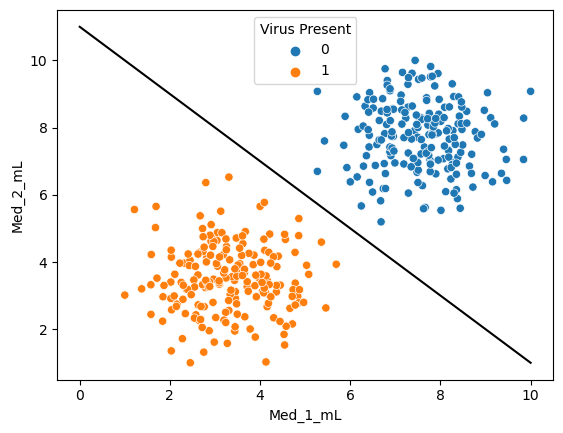

In [10]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)
#gonna manually make a hyperplane
x=np.linspace(0,10,100)
m=-1
b=11
y=m*x+b
plt.plot(x,y,'black')

In [11]:
from sklearn.svm import SVC#support vector classifier
#Note diff between classifier and machine is inclusion of kernel

In [12]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

note C=should be adjusted if wanna allow for misclassifications and must remember that here has to be inverse, kernel, may need addition of beta and gamma
rbf usually works best and sort have to work around gamma also

In [13]:
y=df['Virus Present']

In [14]:
X=df.drop('Virus Present',axis=1)

In [15]:
model=SVC(kernel='linear',C=1000)

In [16]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

NOTE: HERE THIS DUDE DIDNT DO A TRAIN TEST SPLIT CUZ USING FOR VISUALIZATION PURPOSES

In [21]:
from svm_margin_plot import plot_svm_boundary

c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


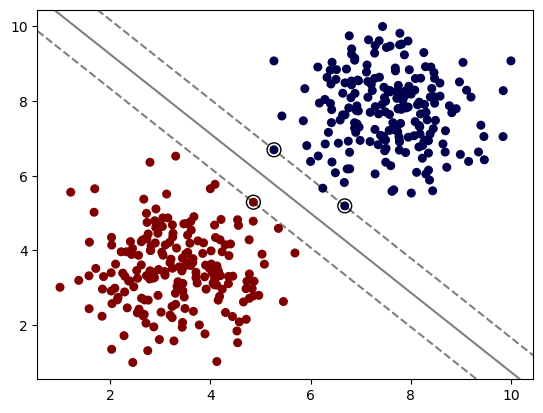

In [22]:
plot_svm_boundary(model,X,y)

finds a linear line and expands the margin till hits the support vectors

parameters specific to each kernel type and c(is regularizaton =measurement of how many points letting t o be in the margin, here in scikit learn is inverse so if taking around 0 allowing a lot of points)

In [24]:
model=SVC(kernel='linear',C=0.05)
model.fit(X,y)

SVC(C=0.05, kernel='linear')